Adaline is quite similar to perceptron, with the difference that weights are uploaded by minimizing the cost function via gradient descent.

In [1]:
import numpy as np
import pandas as pd

In [2]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -----------
    eta: float
        Learning rate (b/w 0 and 1)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Sum-of-squares cost function value in each epoch
    """
    def __init__(self, eta = 0.01, n_iter = 50, randome_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = randome_state
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is rows, n_features is columns
        y : {array-like}, shape = [n_samples]
            Target value
        
        Returns
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear acitivation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

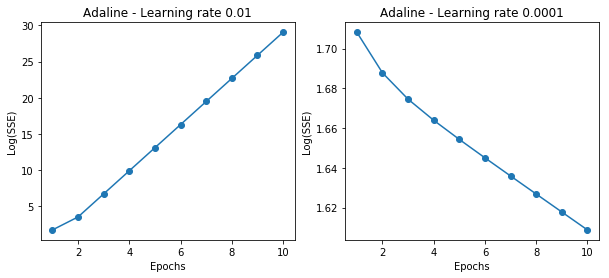

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1),
           np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(SSE)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1),
           np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log(SSE)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

standardization helps with gradient descent learning, because it prevents overshooting.

In [6]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean())/X[:,0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean())/X[:,1].std()

In [7]:
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

In [8]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')

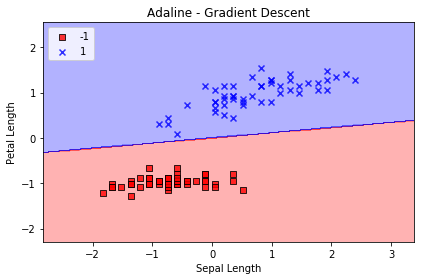

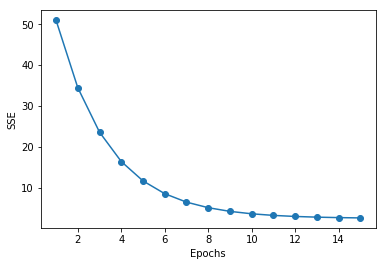

In [12]:
plot_decision_region(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Update the weights via stochastic gradient descent. The difference is that **batch gradient descent** updates the weights by taking the whole training set into account, and **stochastic gradient descent** updates the weights for each training sample. SGD reaches convergence much faster because of the more frequent weight updates (present it training data in a random order, that is, shuffle the training set for every epoch). 

In [23]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier using Stochastic Gradient Descent
    
    Parameters
    -------------
    eta : float
        Learning rate (0 ~ 1)
    n_iter : int
        Passes over the training dataset
    shuffle : bool (default : True)
        Shuffles training data every epoch if True to prevent cycles
    randome_state : int
        Randome number generator seed for random weights initialization.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Sum of Squares cost function value averaged over all training samples in each epoch
        
    """
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = False
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        -------------
        X : training vectors
        y : target values
        
        Returns
        ------------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializaing weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] >1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0, scale = 0.01, size = 1 +m)
        self.w_initialzed = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta*error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

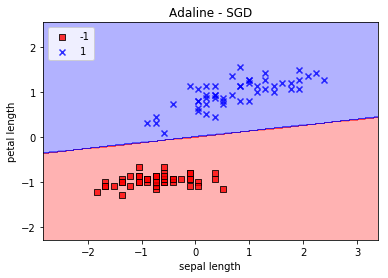

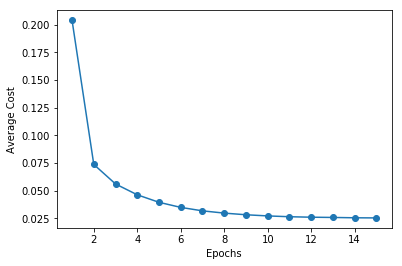

In [27]:
ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada.fit(X_std, y)

plot_decision_region(X_std, y, classifier = ada)
plt.title('Adaline - SGD')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()